# 

In [18]:
import open3d as o3d
import matplotlib.pyplot as plt
import numpy as np
import cv2,os,copy,json

['000000.png', '000001.png', '000002.png', '000003.png', '000004.png', '000005.png', '000006.png', '000007.png', '000008.png', '000009.png', '000010.png', '000011.png', '000012.png']
RGBDImage of size 
Color image : 1920x1080, with 1 channels.
Depth image : 1920x1080, with 1 channels.
Use numpy.asarray to access buffer data.


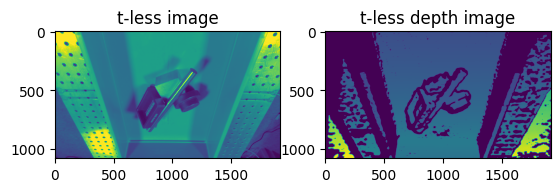

In [16]:
# 读取 展示
datadir = "E:/DataSets/000592/"
print(os.listdir(datadir+'rgb'))

color_raw = o3d.io.read_image(datadir+'rgb/000000.png')
depth_raw = o3d.io.read_image(datadir+'depth/000000.png')

rgbd_image = o3d.geometry.RGBDImage.create_from_tum_format(
    color_raw, depth_raw)

print(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('t-less image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('t-less depth image')
plt.imshow(rgbd_image.depth)
# plt.show()
# show_rgbd(rgbd_image)

In [17]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 不支持请求的转换操作。 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 句柄无效。 


In [19]:
jsonPath = datadir+'scene_camera.json'
with open(jsonPath,'r') as f:
    data=json.load(f)
print(data)

{'0': {'cam_K': [1376.4820556640625, 0.0, 960.9125366210938, 0.0, 1375.5010986328125, 550.033203125, 0.0, 0.0, 1.0], 'cam_R_c2w': [0.012613820357139949, -0.7634446044955574, -0.6457501276823081, -0.9999204236687902, -0.009505040956401239, -0.008294608289022265, 0.00019459253352357243, 0.6458033679555161, -0.7635037472540935], 'cam_t_c2w': [385.1993154794656, 4.459041366396803, 457.43773102297155], 'cam_R_w2c': [0.012613820356942616, -0.9999204236685632, 0.00019459253343674402, -0.7634446044961323, -0.0095050409565013, 0.6458033679553868, -0.6457501276829938, -0.008294608289223274, -0.7635037472542598], 'cam_t_w2c': [-0.4891624018014085, -1.2941048952894618, 598.0349149272714]}, '9': {'cam_K': [1376.4820556640625, 0.0, 960.9125366210938, 0.0, 1375.5010986328125, 550.033203125, 0.0, 0.0, 1.0], 'cam_R_c2w': [0.011068375941181381, -0.9999385779960986, -0.0005755772506678773, -0.9377318934476377, -0.010179947825952792, -0.3472106920492297, 0.34718350632691247, 0.0043827956161847596, -0.9377

In [21]:
data.keys()

dict_keys(['0', '9', '10', '11', '12', '1', '2', '3', '4', '5', '6', '7', '8'])